In [5]:
import os
import numpy as np

from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types

In [6]:
batch_size = 2
sequence_length = 8
initial_prefetch_size = 16
video_directory = os.path.join("/gscratch/balazinska/enhaoz/VOCAL-UDF/data/clevrer/video_00000-01000")
video_files = [video_directory + "/" + f for f in os.listdir(video_directory)]
n_iter = 6

In [7]:
@pipeline_def
def video_pipe(filenames):
    videos = fn.readers.video(
        device="gpu",
        filenames=filenames,
        sequence_length=sequence_length,
        shard_id=0,
        num_shards=1,
        random_shuffle=True,
        initial_fill=initial_prefetch_size,
    )
    return videos

In [8]:
pipe = video_pipe(
    batch_size=batch_size, num_threads=2, device_id=0, filenames=video_files, seed=12345
)
pipe.build()
for i in range(n_iter):
    pipe_out = pipe.run()
    sequences_out = pipe_out[0].as_cpu().as_array()
    print(sequences_out.shape)

[/opt/dali/dali/operators/reader/loader/video_loader.h:179] ``file_list_include_preceding_frame`` uses the default value False. In future releases, the default value will be changed to True.


(2, 8, 320, 480, 3)
(2, 8, 320, 480, 3)
(2, 8, 320, 480, 3)
(2, 8, 320, 480, 3)
(2, 8, 320, 480, 3)
(2, 8, 320, 480, 3)


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [10]:
def show_sequence(sequence):
    columns = 4
    rows = (sequence_length + 1) // (columns)
    fig = plt.figure(figsize=(32, (16 // columns) * rows))
    gs = gridspec.GridSpec(rows, columns)
    for j in range(rows * columns):
        plt.subplot(gs[j])
        plt.axis("off")
        plt.imshow(sequence[j])

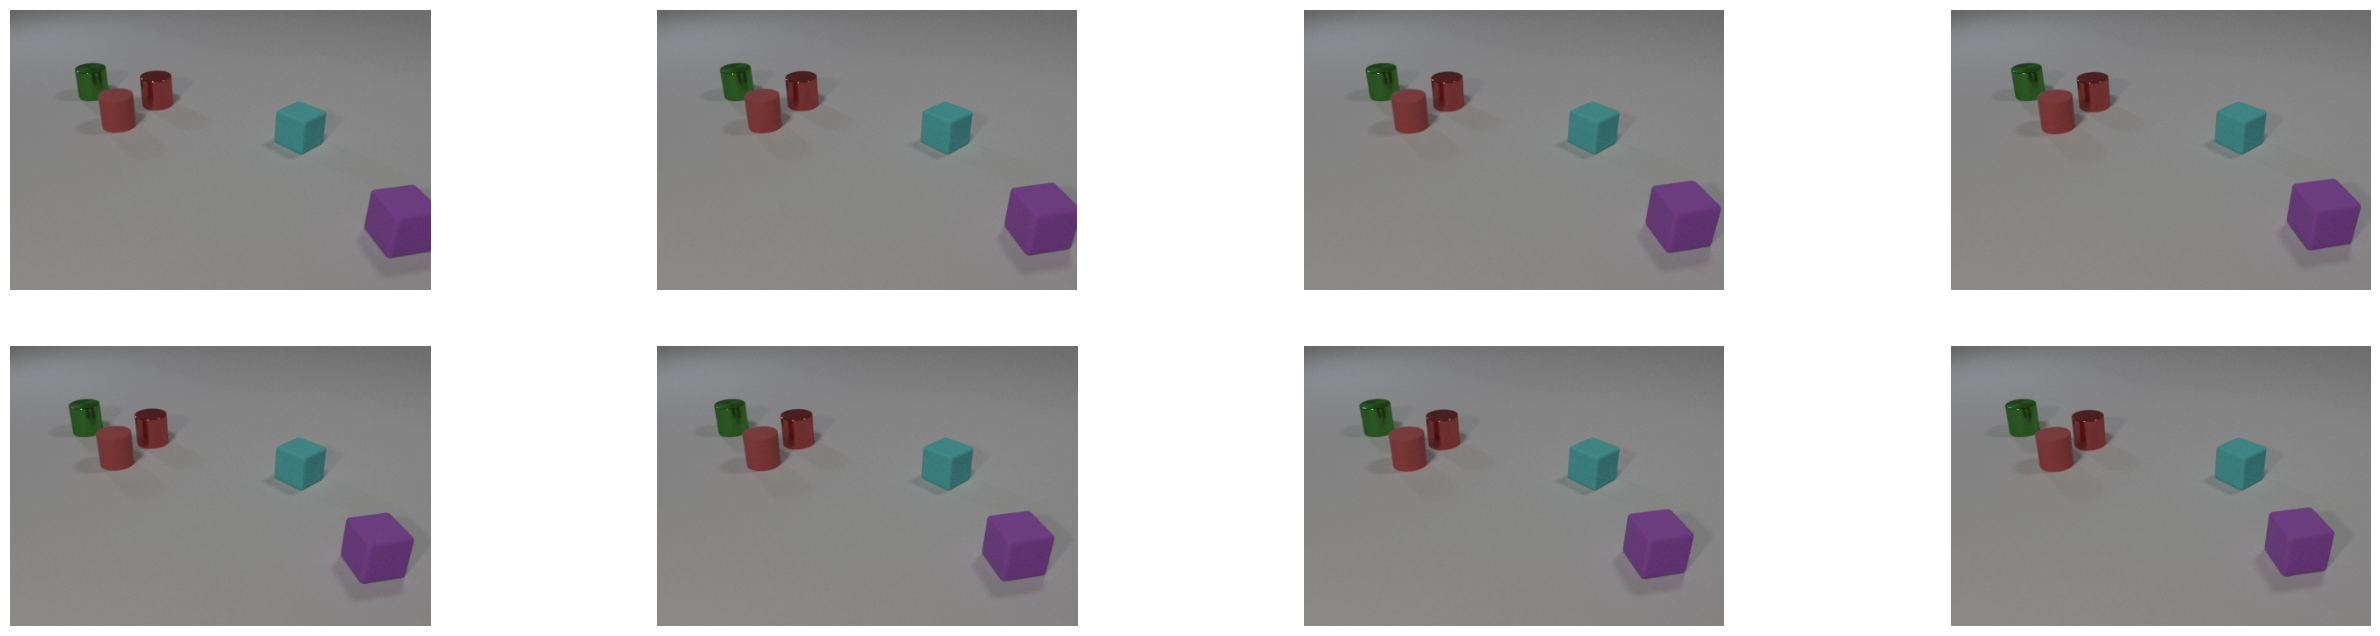

In [11]:
pipe_out = pipe.run()
sequences_out = pipe_out[0].as_cpu().as_array()
show_sequence(sequences_out[0])